In [6]:
from keras.applications import VGG16
from keras import backend as K
import numpy as np
model = VGG16(weights='imagenet',include_top=False)
layer_name = 'block3_conv1'
filter_index = 1
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [2]:
grads = K.gradients(loss, model.input)[0]

In [3]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [4]:
iterate = K.function([model.input], [loss, grads])

In [7]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [10]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [12]:
img = input_img_data[0]

In [13]:
img = deprocess_image(img)

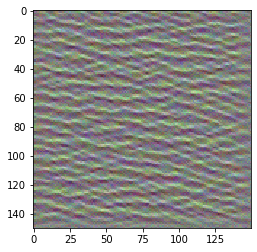

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)